Vous allez faire la classification par la méthode "le plus proche voisin"  du dataset Iris.

Vous avez vu l'essentiel  pendant la première séance.

Exécutez les commandes et essayez de comprendre comment ca fonctionne

Récupérez le dataset iris  (voir le notebook introapprentissage.ipynb)
 

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()


Quels sont les clés de ce dataset?

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Affichez et lisez la clé 'DESCR' pour avoir des informations sur ce dataset. 

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Quelle est  la taille de la matrice de données (data)

In [4]:
iris.data.shape

(150, 4)

Quels  sont des attributs (features)

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Quelles sont des étiquettes?

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Comment les étiquettes sont représentées?

In [12]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Partitionez le dataset pour avoir X_train, y_train X_test, y_test

%80 pour l'ensemble d'apprentissage, %20 pour l'ensemble de test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Quelles sont les nombres de données dans l'ensemble d'apprentissage et celles qui sont dans l'ensemble de test?


In [13]:
X_train.shape, X_test.shape


((120, 4), (30, 4))


Importez  la méthode du k plus proche voisins



In [14]:
from sklearn.neighbors import KNeighborsClassifier

Construisez  le modèle pour le nombre de voisin=1 et pour l'ensemble d'apprentissage



In [15]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)


,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Prevoyez l'étiquette  pour la donnée avec 
'sepal length (cm)' = 5
'sepal width (cm)' = 2.9
'petal length (cm)' = 1
'petal width (cm)' = 0.2

Attention la donnée doit être une matrice avec 1 ligne et 4 colonnes

In [16]:
import numpy as np

xnew = np.array([[5, 2.9, 1, 0.2]])
prediction = knn1.predict(xnew)

iris.target_names[prediction[0]]

np.str_('setosa')

Affichez le score (la probabilité d'estimer la bonne étiquette) pour l'ensemble de test

In [17]:
knn1.score(X_test, y_test)

1.0

Vous ne changez pas les ensembles d'apprentissage et de test.

Vous changez la méthode k=2, k=3, k=4, k+5

Vous faites la prédiction pour xnew  avec ces méthodes 

Calculez les scores pour ces méthodes  et dessinez la courbe (axe x : la valeur de k; axe y : score)

Que observez-vous?



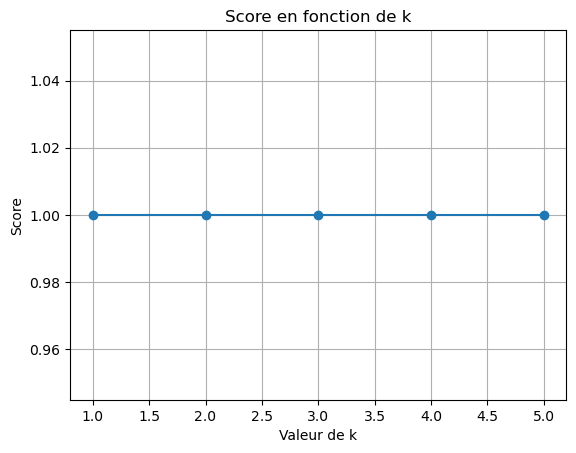

In [18]:
import matplotlib.pyplot as plt

k_values = [1, 2, 3, 4, 5]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.plot(k_values, scores, marker='o')
plt.xlabel("Valeur de k")
plt.ylabel("Score")
plt.title("Score en fonction de k")
plt.grid()
plt.show()

Vous lisez  la partie "Cross Validation" à la fin du noteboke KNNClassification.

Vous appliquez pour ce data set et quelle méthode est meillure pour le dataset Iris?

Avez-vous trouvé le même résultat par rapport au résultat précédent ou non?

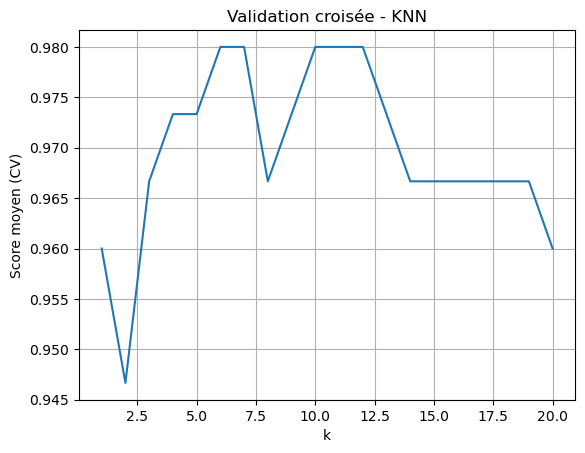

In [19]:

from sklearn.model_selection import cross_val_score

k_range = range(1, 21)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    cv_scores.append(scores.mean())

plt.plot(k_range, cv_scores)
plt.xlabel("k")
plt.ylabel("Score moyen (CV)")
plt.title("Validation croisée - KNN")
plt.grid()
plt.show()



In [2]:
#soit model avec le nombre de voisins optimal
#affichez la matrice de confusion

#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, model.predict(X_test))

#Diagonal: nombre des bonnes estimations

In [20]:
from sklearn.metrics import confusion_matrix

best_k = k_range[cv_scores.index(max(cv_scores))]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

confusion_matrix(y_test, model.predict(X_test))


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)